## Candy Power Ranking

This folder contains the data behind the story [The Ultimate Halloween Candy Power Ranking](http://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/).

`candy-data.csv` includes attributes for each candy along with its ranking. For binary variables, 1 means yes, 0 means no.

The data contains the following fields:

| Header | Description                                                      |
| ------ | ---------------------------------------------------------------- |
| chocolate           | Does it contain chocolate?                                       |
| fruity              | Is it fruit flavored?                                            |
| caramel             | Is there caramel in the candy?                                   |
| peanutalmondy       | Does it contain peanuts, peanut butter or almonds?               |
| nougat              | Does it contain nougat?                                          |
| crispedricewafer    | Does it contain crisped rice, wafers, or a cookie component?     |
| hard                | Is it a hard candy?                                              |
| bar                 | Is it a candy bar?                                               |
| pluribus            | Is it one of many candies in a bag or box?                       |
| sugarpercent        | The percentile of sugar it falls under within the dataset.       |
| pricepercent        | The unit price percentile compared to the rest of the set.       |
| winpercent          | The overall win percentage according to 269,000 matchups.        |

(from the repository on [GitHub](https://github.com/fivethirtyeight/data/blob/master/candy-power-ranking/README.md))

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

lidl_blue = '#004fab'
lidl_red = '#e7030c'
lidl_yellow = '#fff000'

In [9]:
# load dataset
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv"
df = pd.read_csv(url, index_col=0)

# saved data also in folder to look at

# show data info
# print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 100 Grand to Whoppers
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   pluribus          85 non-null     int64  
 9   sugarpercent      85 non-null     float64
 10  pricepercent      85 non-null     float64
 11  winpercent        85 non-null     float64
dtypes: float64(3), int64(9)
memory usage: 8.6+ KB
None


In [10]:
# check if data is missing
print(df.isnull().sum())

chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


In [11]:
# objects with no listed ingredients
print(df[df.iloc[:, 0:9].sum(axis=1) == 0].index)

# same with for
# for i in df[df.iloc[:, 0:9].sum(axis=1) == 0].index:
#     print(i)

Index(['One dime', 'One quarter'], dtype='object', name='competitorname')


In [12]:
# adjust ingredients (bar is not an ingredient, but a type of candy for example)

In [13]:
# get average number of ingredients 
ingredients = df.iloc[:, 0:6]

# print(ingredients)

# get average of each row by counting how many 1s
ingredients = ingredients.sum(axis=1)

# get average of average_ingredients
print('\nAverage number of ingredients: ', round(ingredients.mean(), 2))

# add average ingredients to dataframe
df['ingredients'] = ingredients


Average number of ingredients:  1.38


In [14]:
# copy df and remove sugarpercent, pricepercent and average_ingredients
df_corr = df.copy()
df_corr = df_corr.drop(['sugarpercent', 'pricepercent', 'ingredients'], axis=1)

# Korrelationsmatrix berechnen
correlation_matrix = df_corr.corr()

# Korrelationen mit der Beliebtheitsspalte sortieren
popularities = correlation_matrix['winpercent'].sort_values(ascending=False)

print(popularities)

winpercent          1.000000
chocolate           0.636517
bar                 0.429929
peanutyalmondy      0.406192
crispedricewafer    0.324680
caramel             0.213416
nougat              0.199375
pluribus           -0.247448
hard               -0.310382
fruity             -0.380938
Name: winpercent, dtype: float64


In [15]:
# remove winpercent from correlation matrix
# correlation_matrix = correlation_matrix.drop('winpercent', axis=1)

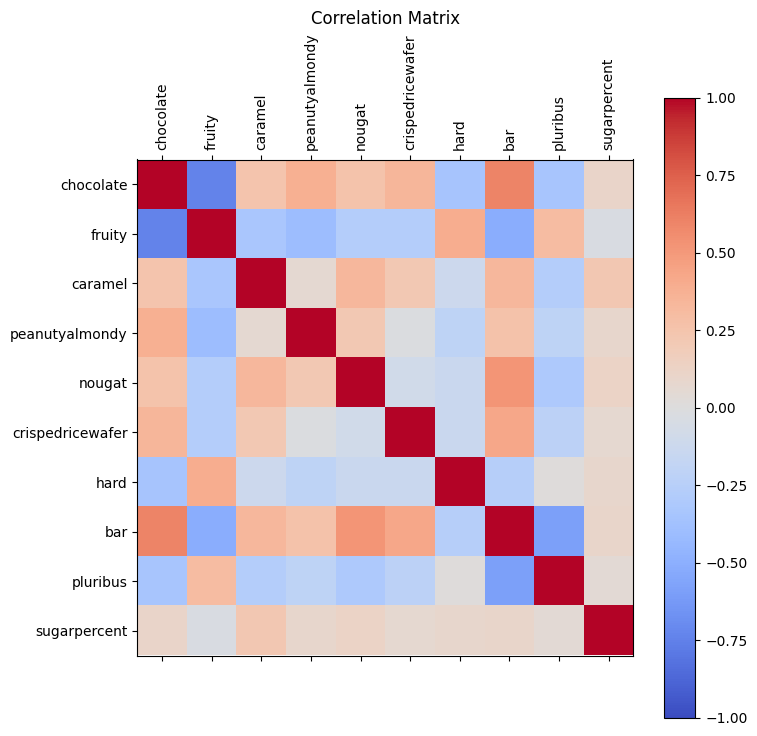

In [31]:
# visualizing the correlation 
plt.figure(figsize=(8, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

# seaborn
# plt.figure(figsize=(8, 8))
# sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=True)
# plt.title('Correlation Matrix')
# plt.show()

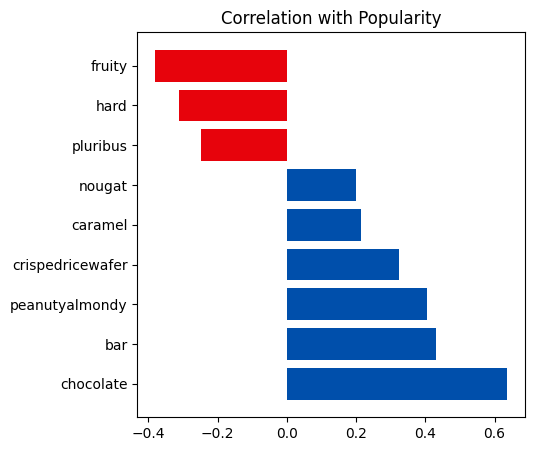

In [33]:
# dro pwinpercent from popularities
pop_bar = popularities.drop('winpercent', axis=0)

# visualize witih bar chart
plt.figure(figsize=(5, 5))
# plt.barh(pop_bar.index, pop_bar.values, color=lidl_blue)

# if positive, lidl_blue, if negative, lidl_red
for i in range(len(pop_bar)):
    if pop_bar[i] > 0:
        plt.barh(pop_bar.index[i], pop_bar.values[i], color=lidl_blue)
    else:
        plt.barh(pop_bar.index[i], pop_bar.values[i], color=lidl_red)

plt.title('Correlation with Popularity')
plt.show()

# repeat with seaborn
# plt.figure(figsize=(5, 5))
# sns.barplot(x=pop_bar.values, y=pop_bar.index, orient='h', palette='coolwarm')
# plt.title('Correlation with Popularity')
# plt.show()

In [18]:
# Calculate correlation matrix without the last 3 columns
correlation_matrix = df.iloc[:, :-3].corr()

# create list of ingredients
ingredients = list(df.columns[0:-3])
print(ingredients, end='\n\n')

# find top 3 correlations for each ingredient
for ingredient in ingredients:
    print(ingredient)
    print(correlation_matrix[ingredient].nlargest(4)[1:])               # in this case the first one (1.0) is always the target itself
    print('\n')

['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent']

chocolate
bar                 0.597421
peanutyalmondy      0.377824
crispedricewafer    0.341210
Name: chocolate, dtype: float64


fruity
hard            0.390678
pluribus        0.299725
sugarpercent   -0.034393
Name: fruity, dtype: float64


caramel
bar          0.333960
nougat       0.328493
chocolate    0.249875
Name: caramel, dtype: float64


peanutyalmondy
chocolate    0.377824
bar          0.260420
nougat       0.213113
Name: peanutyalmondy, dtype: float64


nougat
bar          0.522976
caramel      0.328493
chocolate    0.254892
Name: nougat, dtype: float64


crispedricewafer
bar          0.423751
chocolate    0.341210
caramel      0.213113
Name: crispedricewafer, dtype: float64


hard
fruity          0.390678
sugarpercent    0.091810
pluribus        0.014532
Name: hard, dtype: float64


bar
chocolate           0.597421
nougat              0.522976
cris

In [19]:
# # visualize the top 3 correlations for each ingredient
# for ingredient in ingredients:
#     plt.figure(figsize=(5, 5))
#     plt.barh(correlation_matrix[ingredient].nlargest(4)[1:].index, correlation_matrix[ingredient].nlargest(4)[1:].values, color=lidl_blue)
#     plt.title('Top 3 Correlations for ' + ingredient)
#     plt.show()

In [20]:
# see how much sugar is in the candy
# sugar = df['sugarpercent']

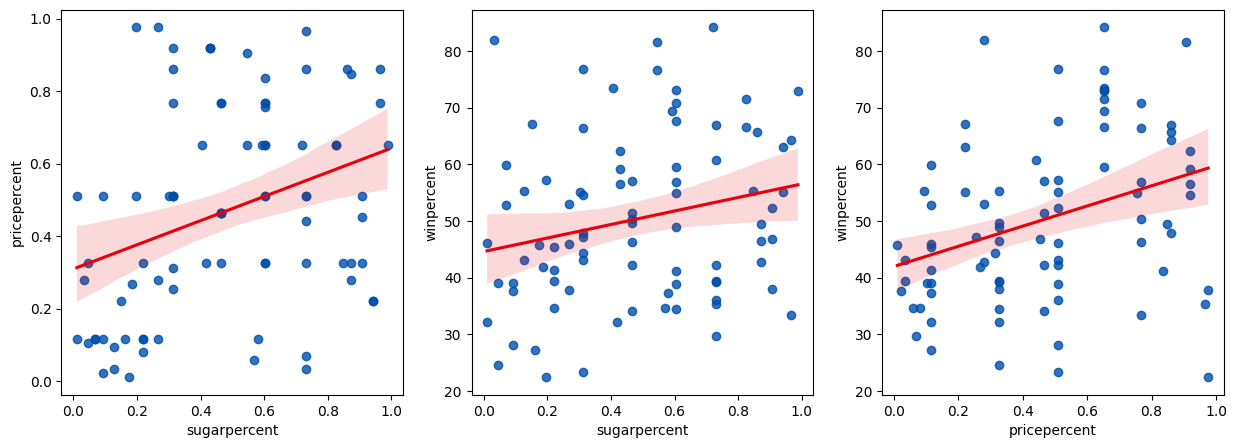

In [39]:
# compare different correlations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# sugar and price
sns.regplot(x='sugarpercent', y='pricepercent', data=df, ax=ax1, scatter_kws={'color': lidl_blue}, line_kws={'color': lidl_red})

# sugar and popularity
sns.regplot(x='sugarpercent', y='winpercent', data=df, ax=ax2, scatter_kws={'color': lidl_blue}, line_kws={'color': lidl_red})

# prices and popularity
sns.regplot(x='pricepercent', y='winpercent', data=df, ax=ax3, scatter_kws={'color': lidl_blue}, line_kws={'color': lidl_red})

# show
plt.show()

Learned: The more sugar a product has, the more expensive it is, but it also gets more popular then. But also the more expensive a product is, the more popular it is (this does not necessarily mean that making the product more expensive will winn more customers). 

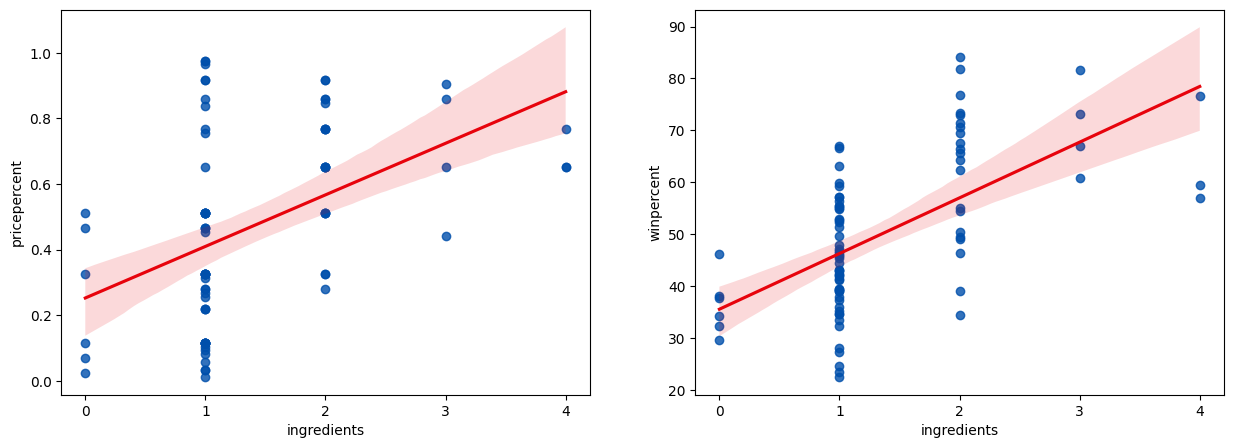

In [48]:
# ingredients and price + ingredients and popularity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.regplot(x='ingredients', y='pricepercent', data=df, ax=ax1, scatter_kws={'color': lidl_blue}, line_kws={'color': lidl_red})
sns.regplot(x='ingredients', y='winpercent', data=df, ax=ax2, scatter_kws={'color': lidl_blue}, line_kws={'color': lidl_red})

# set xticks to only show integers
ax1.set_xticks(range(0, 5))
ax2.set_xticks(range(0, 5))

plt.show()

Learned: The more ingredients a product has, the more expensive it is - but the popularity also increases with the number of ingredients.

# Experiments

In [23]:
# neural network